In [1]:
import math
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [2]:
Q = [31.612, 44.314, 56.287, 70.265]
Pwf = [4258.3, 4190.4, 4093.5, 3951.9]

In [3]:
k = 0      # iteration counter
Pr = float(input('Make an initial guess for reservoir pressure : '))
C = float(input('Make an initial guess for flow coefficient(C) : '))
n = float(input('Make an initial guess for flow exponent(n) : '))
h = C

Make an initial guess for reservoir pressure : 4350
Make an initial guess for flow coefficient(C) : 0.0376
Make an initial guess for flow exponent(n) : 0.5


In [4]:
while abs(h/C)*100 >= 10**-10:
    part_der_Pr = []
    for i in Pwf:
        part_der_Pr.append(2 * Pr * n * C * (Pr**2 - i**2)**(n-1))
        
    part_der_C = []
    for i in Pwf:
        part_der_C.append((Pr**2 - i**2)**n)
        
    part_der_n = []
    for i in Pwf:
        part_der_n.append(C * (Pr**2 - i**2)**n * np.log(C * (Pr**2 - i**2)))
    
    X = np.zeros([4,3])
    X[:, 0] = part_der_Pr
    X[:, 1] = part_der_C
    X[:, 2] = part_der_n
    
    d = []
    for a,b in zip(Q, Pwf):
        d.append(a - C*(Pr**2 - b**2)**n)
    
    y = np.zeros([4,1])
    y[:, 0] = d
    
    test = np.linalg.det(np.linalg.inv(np.matmul(X.T, X))) 
    if math.isnan(test):
        print('Solution did not converge due to the occurrence of singular matrix')
        print('Please make better guesses')
        break
        
    else:
        beta = np.matmul(np.linalg.inv(np.matmul(X.T, X)),  np.matmul(X.T, y))
    
                     
        Pr += beta[0]
        C +=  beta[1]
        n += beta[2]
        h = beta[1]
        k += 1

        
if math.isnan(test):
    pass
else:
    print('The estimated Reservoir Pressure is: {}' .format((Pr + beta[0])))
    print('The estimated flow coefficient(C)  is: {}' .format((C + beta[1])))
    print('The estimated flow exponent(n)  is: {}' .format((n + beta[2])))
    print('The solution was obtained after ' + str(k) + ' iterations')

The estimated Reservoir Pressure is: [4322.84273657]
The estimated flow coefficient(C)  is: [0.06813622]
The estimated flow exponent(n)  is: [0.46442311]
The solution was obtained after 11 iterations


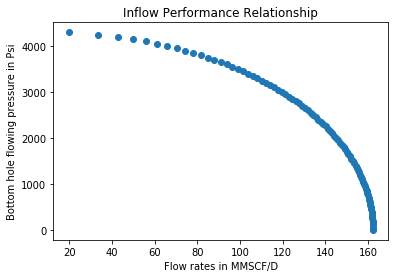

In [6]:
import matplotlib.pyplot as plt

assumed_Pwf = []
for i in list(range (0, (int(Pr) + 100), 50)):
    assumed_Pwf.append(i)
    
estimated_Q = []
for i in assumed_Pwf:
    estimated_Q.append(C * (Pr**2 - i**2)**n)

plt.scatter(estimated_Q, assumed_Pwf)
plt.xlabel('Flow rates in MMSCF/D')
plt.ylabel('Bottom hole flowing pressure in Psi')
plt.title('Inflow Performance Relationship')
plt.savefig('Gauss_Newton_IPR.png')
plt.show() 